In [49]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('churn_analysis.csv')

In [4]:
data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [5]:
data.describe()

,Unnamed: 0,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1666.00000,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.990999,0.484236
std,962.29855,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.819138,0.138560
min,0.00000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
25%,833.00000,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.390000
50%,1666.00000,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,1.000000,0.480000
75%,2499.00000,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,2.000000,0.580000
max,3332.00000,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,2.000000,0.960000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
Unnamed: 0        3333 non-null int64
state             3333 non-null object
account_length    3333 non-null int64
area_code         3333 non-null int64
intl_plan         3333 non-null object
vmail_plan        3333 non-null object
vmail_message     3333 non-null int64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
intl_charge       3333 non-null float64
custserv_calls    3333 non-null int64
treatment         3333 non-null int64
mes_estim         3333 non-null float64
churn             3333 non-null obje

In [7]:
control=data.loc[data.treatment==1]

In [11]:
from itertools import combinations

In [27]:
state_churn=control.pivot_table('Unnamed: 0','state','churn','count')
state_churn[np.isnan(state_churn)]=0

In [28]:
state_churn.index

Index([u'AK', u'AL', u'AR', u'AZ', u'CA', u'CO', u'CT', u'DC', u'DE', u'FL',
       u'GA', u'HI', u'IA', u'ID', u'IL', u'IN', u'KS', u'KY', u'LA', u'MA',
       u'MD', u'ME', u'MI', u'MN', u'MO', u'MS', u'MT', u'NC', u'ND', u'NE',
       u'NH', u'NJ', u'NM', u'NV', u'NY', u'OH', u'OK', u'OR', u'PA', u'RI',
       u'SC', u'SD', u'TN', u'TX', u'UT', u'VA', u'VT', u'WA', u'WI', u'WV',
       u'WY'],
      dtype='object', name=u'state')

In [29]:
import scipy.stats

In [30]:
chi2_val=pd.DataFrame(columns=['state1','state2',"chi2_stat",'p_value'])
i=0
for st1,st2 in combinations(state_churn.index,2):
    chi2_table=state_churn.loc[[st1,st2],:]
    chi2_val.loc[i,'state1']=st1
    chi2_val.loc[i,'state2']=st2
    chi2_stat=scipy.stats.chi2_contingency(chi2_table.values,correction=False)
    chi2_val.loc[i,'chi2_stat']=chi2_stat[0]
    chi2_val.loc[i,'p_value']=chi2_stat[1]
    i+=1

In [31]:
chi2_val

,state1,state2,chi2_stat,p_value
0,AK,AL,1.54672,0.213621
1,AK,AR,4.41,0.0357288
2,AK,AZ,0.419079,0.517397
3,AK,CA,4.84435,0.0277369
4,AK,CO,2.68864,0.101066
5,AK,CT,1.54672,0.213621
6,AK,DC,0.00138691,0.970293
7,AK,DE,0.0139916,0.905841
8,AK,FL,0.36036,0.548306
9,AK,GA,0.309127,0.578216


In [32]:
p_en=chi2_val.loc[chi2_val.p_value<0.05]

In [34]:
p_en.shape

(34, 4)

In [35]:
state_churn

churn,False.,True.
state,,
AK,19.0,1.0
AL,25.0,5.0
AR,11.0,5.0
AZ,17.0,2.0
CA,10.0,5.0
CO,17.0,5.0
CT,25.0,5.0
DC,18.0,1.0
DE,16.0,1.0


In [36]:
chi2_val=pd.DataFrame(columns=['state1','state2',"chi2_stat",'p_value'])
i=0
for st1,st2 in combinations(state_churn.index,2):
    chi2_table=state_churn.loc[[st1,st2],:]
    chi2_val.loc[i,'state1']=st1
    chi2_val.loc[i,'state2']=st2
    chi2_stat=scipy.stats.chi2_contingency(chi2_table.values,correction=True)
    chi2_val.loc[i,'chi2_stat']=chi2_stat[0]
    chi2_val.loc[i,'p_value']=chi2_stat[1]
    i+=1

In [37]:
p_en=chi2_val.loc[chi2_val.p_value<0.05]

In [38]:
p_en.shape

(0, 4)

In [40]:
chi2_val

,state1,state2,chi2_stat,p_value
0,AK,AL,0.639205,0.423999
1,AK,AR,2.7225,0.0989429
2,AK,AZ,0.00213816,0.963119
3,AK,CA,3.05496,0.0804911
4,AK,CO,1.4358,0.230821
5,AK,CT,0.639205,0.423999
6,AK,DC,0.474671,0.490846
7,AK,DE,0.373498,0.541104
8,AK,FL,0,1
9,AK,GA,0.00192669,0.964989


In [41]:
chi2_val=pd.DataFrame(columns=['state1','state2',"fisher_stat",'p_value'])
i=0
for st1,st2 in combinations(state_churn.index,2):
    chi2_table=state_churn.loc[[st1,st2],:]
    chi2_val.loc[i,'state1']=st1
    chi2_val.loc[i,'state2']=st2
    fisher_stat=scipy.stats.fisher_exact(chi2_table.values)
    chi2_val.loc[i,'fisher_stat']=fisher_stat[0]
    chi2_val.loc[i,'p_value']=fisher_stat[1]
    i+=1

In [42]:
chi2_val

,state1,state2,fisher_stat,p_value
0,AK,AL,3.8,0.381063
1,AK,AR,8.63636,0.0688616
2,AK,AZ,2.23529,0.60499
3,AK,CA,9.5,0.0639647
4,AK,CO,5.58824,0.187034
5,AK,CT,3.8,0.381063
6,AK,DC,1.05556,1
7,AK,DE,1.1875,1
8,AK,FL,2.11111,1
9,AK,GA,2,1


In [44]:
from scipy import stats

In [45]:
stats.pearsonr(data.day_calls,data.mes_estim)

(-0.051794350587572625, 0.0027798836869756707)

In [47]:
stats.spearmanr(data.day_calls,data.mes_estim)

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([  0,   0,  30, ..., 160, 163, 165], dtype=int64)),
 (20.063266290159007, 100.43564356435644, 0.99890169693028485))

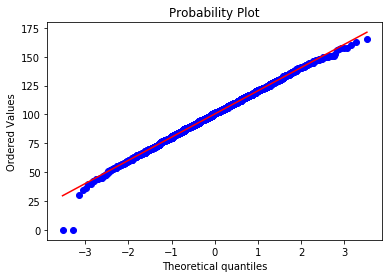

In [50]:
stats.probplot(data.day_calls,plot=plt)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([ 0.05,  0.05,  0.05, ...,  0.89,  0.91,  0.96])),
 (0.13861708020693372, 0.48423642364236419, 0.99960504839853292))

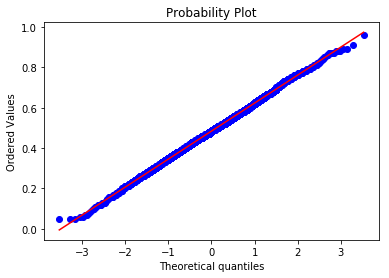

In [51]:
stats.probplot(data.mes_estim,plot=plt)

In [52]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [53]:
cramers_stat(state_churn.values)

0.20039321502033319

In [55]:
stats.chi2_contingency(state_churn)[1]

0.70975900427784733